# Summarizing metrics from disturbed vertical lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_vert_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [114]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'VertSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, vDragP
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_dnorma, ink_dnormd, ink_dnormInva, ink_dnormInvd, ink_Oh, ink_OhInv, 

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


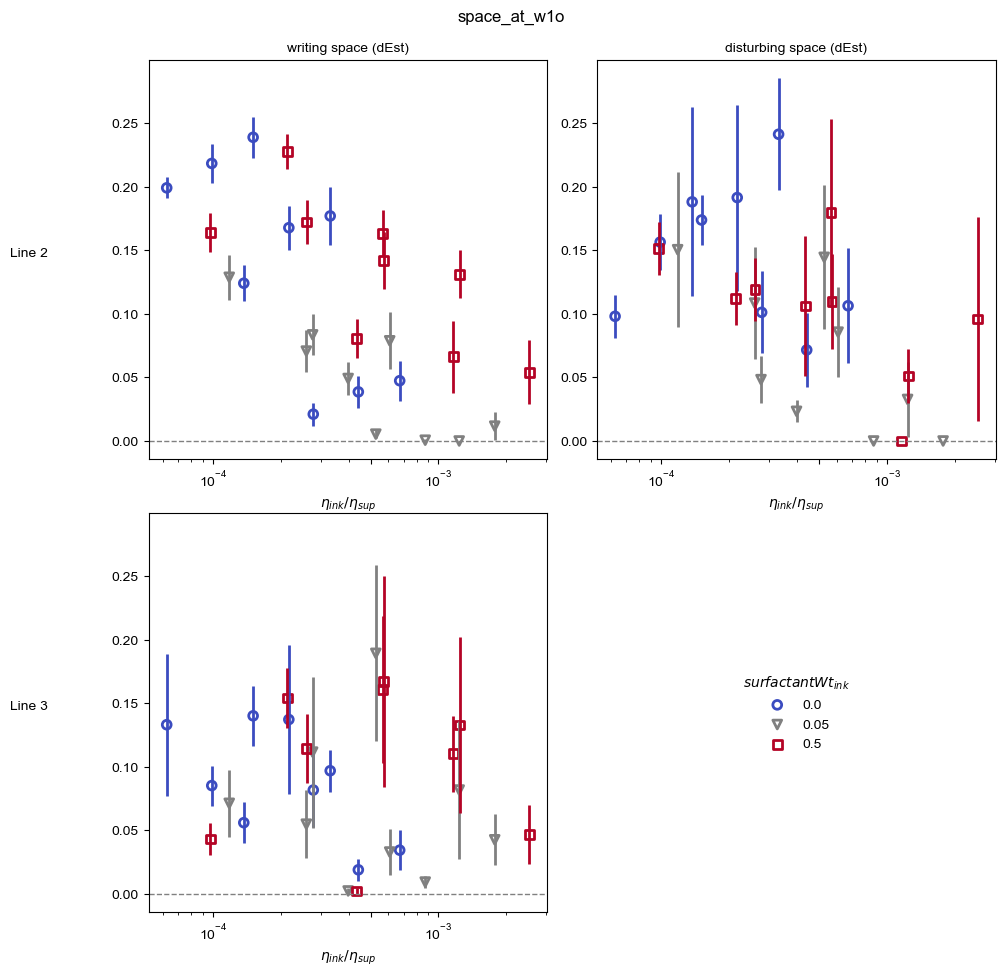

In [10]:
yvl = mp.yvarlines(ms, ms.ss[ms.ss.spacing==0.875], xvar='viscRatio', yvar='space_at', zvar='ink_surfactantWt', llist=[2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal={'wp':0, 'dp':0}
                   , logx=True, mode='scatter', dx=0)

In [71]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'VertSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\VertSDTCorrs.csv


In [37]:
ms.depCor

,spearman_corr,spearman_p,var1,var2
0,0.63,7.25e-55,x0_w1p,dxprint_w1p
1,-0.08,6.86e-02,x0_w1p,segments_w1p
2,0.02,6.74e-01,x0_w1p,x0_w1o
3,-0.79,7.49e-105,x0_w1p,w_w1o
4,0.32,4.39e-13,x0_w1p,h_w1o
...,...,...,...,...
22786,0.16,3.97e-02,delta_emptiness_write3,delta_stdevT_write3
22787,0.44,6.36e-09,delta_emptiness_write3,delta_minmaxT_write3
22788,-0.18,2.08e-02,delta_meanT_write3,delta_stdevT_write3
22789,0.13,9.39e-02,delta_meanT_write3,delta_minmaxT_write3


{'spearman_corr': -0.038043256032036905,
 'spearman_p': 0.6307751393696924,
 'var1': 'delta_w_disturb2',
 'var2': 'delta_x0_disturb2'}

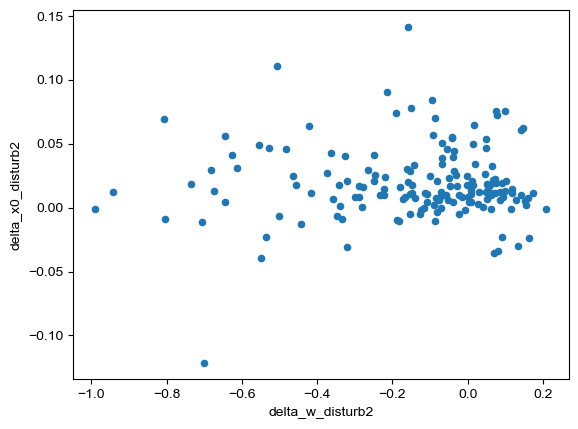

In [80]:
ms.depCorrelation('delta_w_disturb2', 'delta_x0_disturb2', plot=True)

In [74]:
ms.depCor[ms.depCor.spearman_corr>0.9]

,spearman_corr,spearman_p,var1,var2
781,0.9058,7.9277e-185,w_w1o,xf_w1o
2300,0.9245,1.9696e-71,meanT_w1o,w_d1o
7120,0.9429,3.7716e-81,stdevT_d1o,minmaxT_d1o
9272,0.9526,2.8666e-253,delta_x0_w1relax,delta_xc_w1relax
9984,0.9125,2.4770e-66,delta_w_disturb1,delta_xf_disturb1
11905,0.9384,1.1832e-150,space_a_w2p,space_at_w2p
12567,0.9086,3.8831e-124,w_w2o,xf_w2o
14114,0.9476,1.3180e-161,dwdt_w2o,dxfdt_w2o
17122,0.9483,1.2088e-81,stdevT_d2o,minmaxT_d2o
17376,0.9368,7.3631e-75,dwdt_d2o,dxfdt_d2o


In [111]:
rr = ms.reduceRows('segments_w2p', ms.ss.segments_w1o==1, yvarmax=1.01)

,ink_shortname,sup_shortname,int_Ca,spacing,segments_w2p
12,SO10,3.0,203.19,0.50,1.0
380,SO10-S85-0.05,4.0,2220.74,0.75,1.0
378,SO10-S85-0.05,4.0,2220.74,0.50,1.0
361,SO10-S85-0.05,3.5,1011.18,0.62,1.0
360,SO10-S85-0.05,3.5,1011.18,0.50,1.0
355,SO10-S85-0.05,3.5,1011.18,0.62,1.0
354,SO10-S85-0.05,3.5,1011.18,0.50,1.0
342,SO10-S85-0.05,3.0,497.51,0.50,1.0
338,SO10-S85-0.05,3.0,497.51,0.75,1.0
337,SO10-S85-0.05,3.0,497.51,0.62,1.0


In [112]:
ms.openFolder(431)

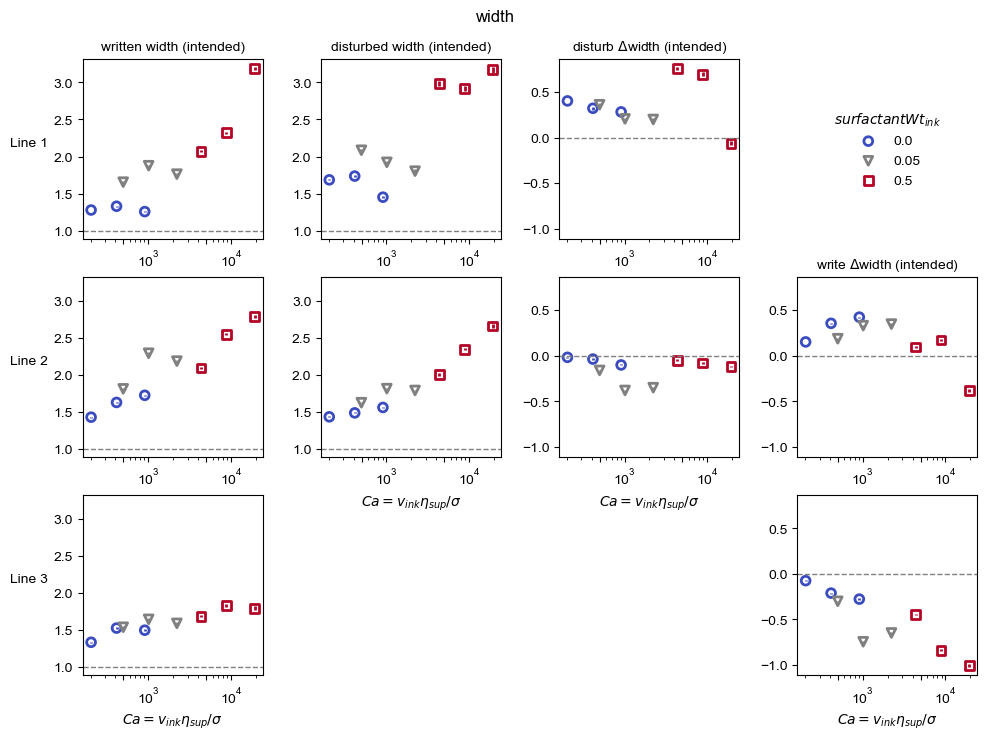

In [122]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='w', zvar='ink_surfactantWt', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

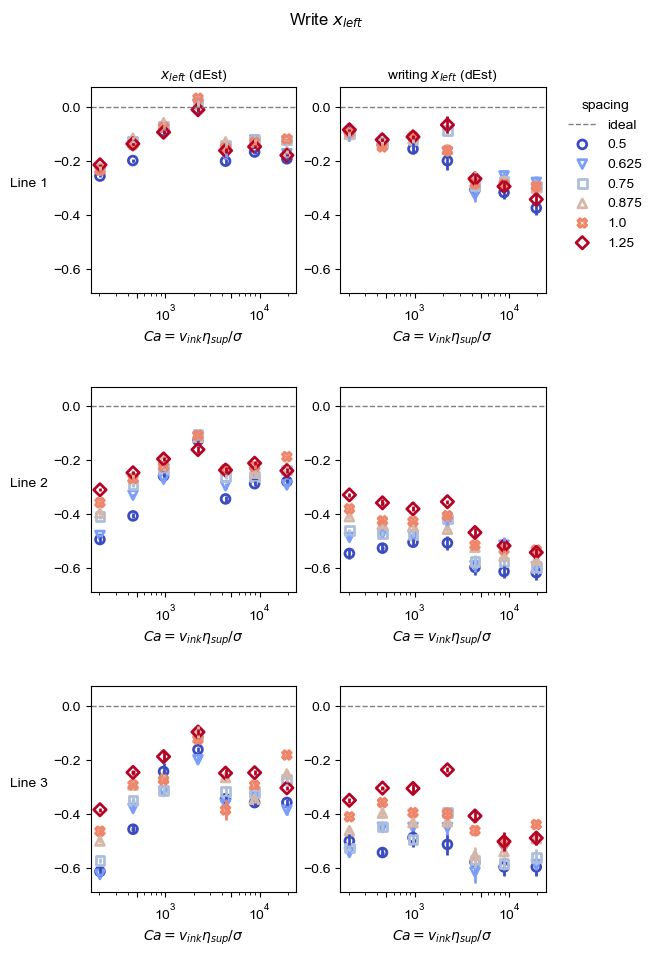

In [83]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='x0', zvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'wp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)

In [85]:
rgt = mp.regressionTables(ms, ms.ss[ms.ss.spacing==1.250], 'segments_w2o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 2nd written segments at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{2nd written segments} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:segments_w2oRegNonZero}
\begin{tabular}{llrrll}
                                         variables & $r^2$ &     b &    c & Spearman coeff & Spearman p \\
                                              $Ca$ &  0.09 & -0.07 & 2.14 &          -0.37 &    7.1e-02 \\
                                        $Ca_{ink}$ &  0.02 & -0.04 & 2.01 &          -0.09 &    6.7e-01 \\
                                        $Ca_{sup}$ &  0.09 & -0.07 & 2.14 &          -0.37 &    7.1e-02 \\
                         $Ca_

In [196]:
rgt.objlist[0].show()

\begin{table}[H]
\centering
\caption[Linear regressions for dhdt_w1o at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{dhdt_w1o} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:dhdt_w1oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                                           spacing &        0.00 &  0.03 & -0.09 &           0.04 &        5.6e-01 \\
                                         $\bm{Ca}$ & $\bm{0.34}$ &  0.10 & -0.21 &    $\bm{0.90}$ & $\bm{1.1e-78}$ \\
                                        $Ca_{ink}$ &        0.18 &  0.08 & -0.01 &           0.62 &        1.7e-24 \\
             